# 系列データにおけるファントム振動の確認

## パッケージのインストール

In [1]:
if(!require("fields", quietly = TRUE))
    install.packages("fields")
if(!require("tagcloud", quietly = TRUE))
    install.packages("tagcloud")
if(!require("FactoMineR", quietly = TRUE))
    install.packages("FactoMineR")

Spam version 2.11-0 (2024-10-03) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


次のパッケージを付け加えます: ‘spam’


以下のオブジェクトは ‘package:base’ からマスクされています:

    backsolve, forwardsolve



Try help(fields) to get started.



## パッケージのロード

In [2]:
library("fields")
library("tagcloud")
library("FactoMineR") 

## 関数定義

In [3]:
seq_color <- function(n){
	smoothPalette(-seq_len(n), pal="RdBu")
}

image.plot2 <- function(x, ...){
	x <- t(x)
	image.plot(x[, ncol(x):1], xaxt="n", yaxt="n", ...)
}

## 人工データの作成

In [4]:
data_zero <- matrix(0, nrow=300, ncol=200)

data_diagonal <- data_zero
diag(data_diagonal) <- 1

data_band_narrow <- data_zero
diag(data_band_narrow) <- 1
diag(data_band_narrow[2:nrow(data_band_narrow), ]) <- 1
diag(data_band_narrow[, 2:ncol(data_band_narrow)]) <- 1

data_band_medium <- data_band_narrow
diag(data_band_medium[3:nrow(data_band_medium), ]) <- 1
diag(data_band_medium[, 3:ncol(data_band_medium)]) <- 1

data_band_wide <- data_band_medium
diag(data_band_wide[4:nrow(data_band_wide), ]) <- 1
diag(data_band_wide[5:nrow(data_band_wide), ]) <- 1
diag(data_band_wide[, 4:ncol(data_band_wide)]) <- 1
diag(data_band_wide[, 5:ncol(data_band_wide)]) <- 1

data_band_gauss <- data_zero
diag(data_band_gauss) <- 5
diag(data_band_gauss[2:nrow(data_band_gauss), ]) <- 3
diag(data_band_gauss[, 2:ncol(data_band_gauss)]) <- 3
diag(data_band_gauss[3:nrow(data_band_gauss), ]) <- 1
diag(data_band_gauss[, 3:ncol(data_band_gauss)]) <- 1

data_richness <- data_zero
diag(data_richness) <- 1
data_richness[lower.tri(data_richness)] <- 1

data_linear <- matrix(0, nrow=300, ncol=200)
data_linear[1:10, ] <- rep(1E-4*(1:ncol(data_linear)), each=10)

set.seed(1234)
data_seq <- runif(10)
data_shift <- data_zero
for(i in seq(191)){
	data_shift[i, i:(i+10-1)] <- data_seq
}

set.seed(1)
data_seq <- 1E+10*runif(499)
k <- 300
data_hankel <- sapply(seq_along(data_seq), function(x){data_seq[x:(x+k-1)]})
data_hankel <- data_hankel[, 1:200]

## 人工データの可視化

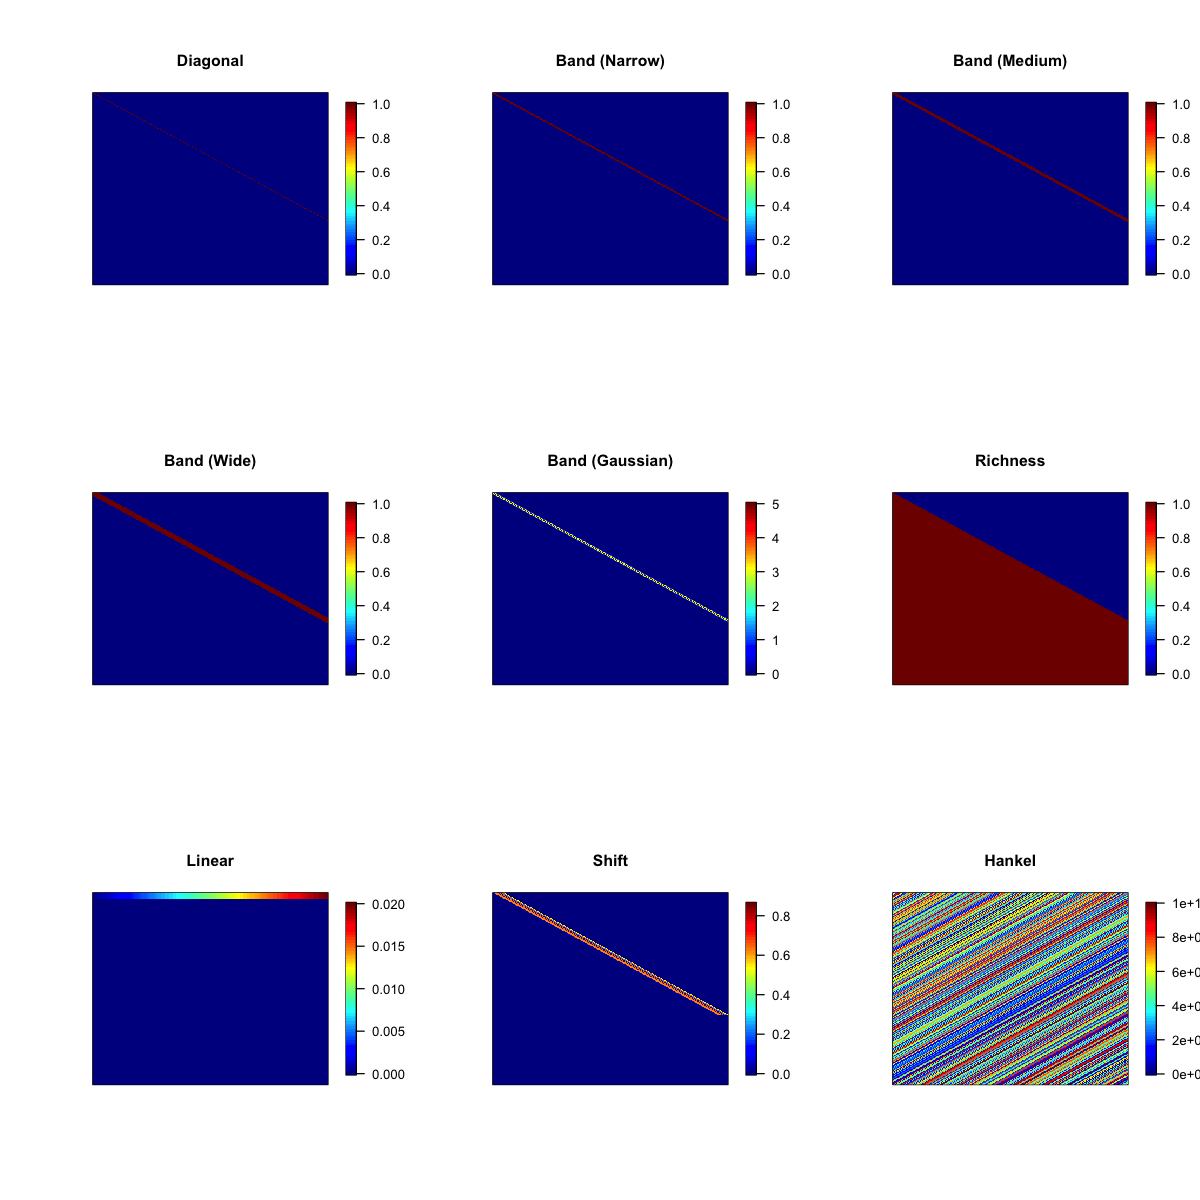

In [5]:
layout(rbind(1:3, 4:6, 7:9))
options(repr.plot.width = 10, repr.plot.height = 10)
image.plot2(data_diagonal, main="Diagonal")
image.plot2(data_band_narrow, main="Band (Narrow)")
image.plot2(data_band_medium, main="Band (Medium)")
image.plot2(data_band_wide, main="Band (Wide)")
image.plot2(data_band_gauss, main="Band (Gaussian)")
image.plot2(data_richness, main="Richness")
image.plot2(data_linear, main="Linear")
image.plot2(data_shift, main="Shift")
image.plot2(data_hankel, main="Hankel")

## 内積行列の可視化

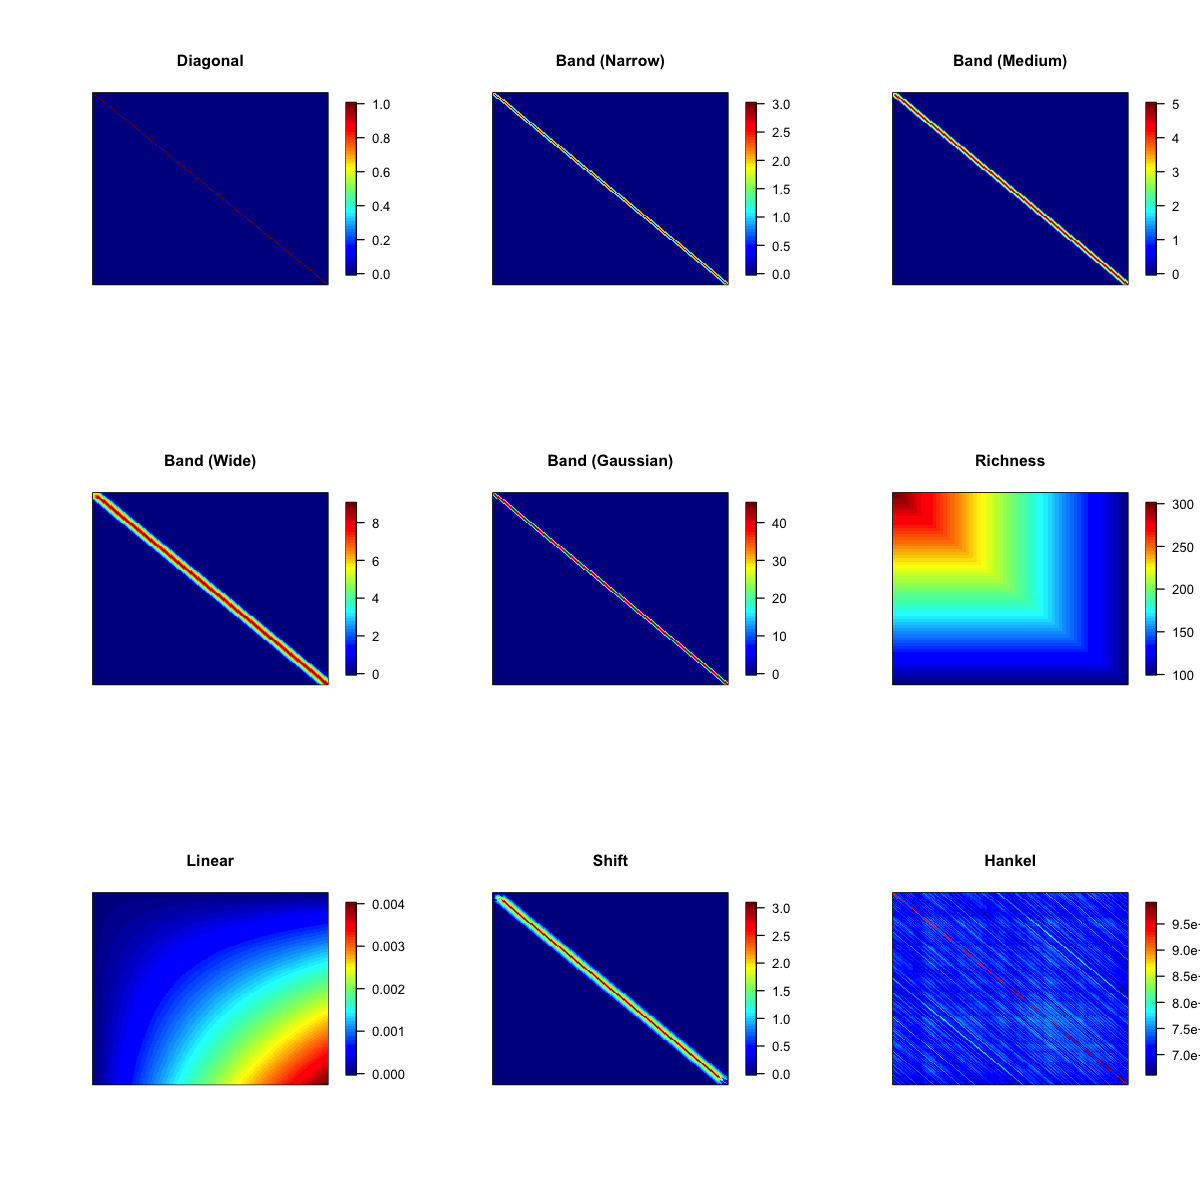

In [6]:
layout(rbind(1:3, 4:6, 7:9))
options(repr.plot.width = 10, repr.plot.height = 10)
image.plot2(t(data_diagonal) %*% data_diagonal, main="Diagonal")
image.plot2(t(data_band_narrow) %*% data_band_narrow, main="Band (Narrow)")
image.plot2(t(data_band_medium) %*% data_band_medium, main="Band (Medium)")
image.plot2(t(data_band_wide) %*% data_band_wide, main="Band (Wide)")
image.plot2(t(data_band_gauss) %*% data_band_gauss, main="Band (Gaussian)")
image.plot2(t(data_richness) %*% data_richness, main="Richness")
image.plot2(t(data_linear) %*% data_linear, main="Linear")
image.plot2(t(data_shift) %*% data_shift, main="Shift")
image.plot2(t(data_hankel) %*% data_hankel, main="Hankel")

## 共分散行列の可視化（Toepritz行列ライクになっていることを確認）

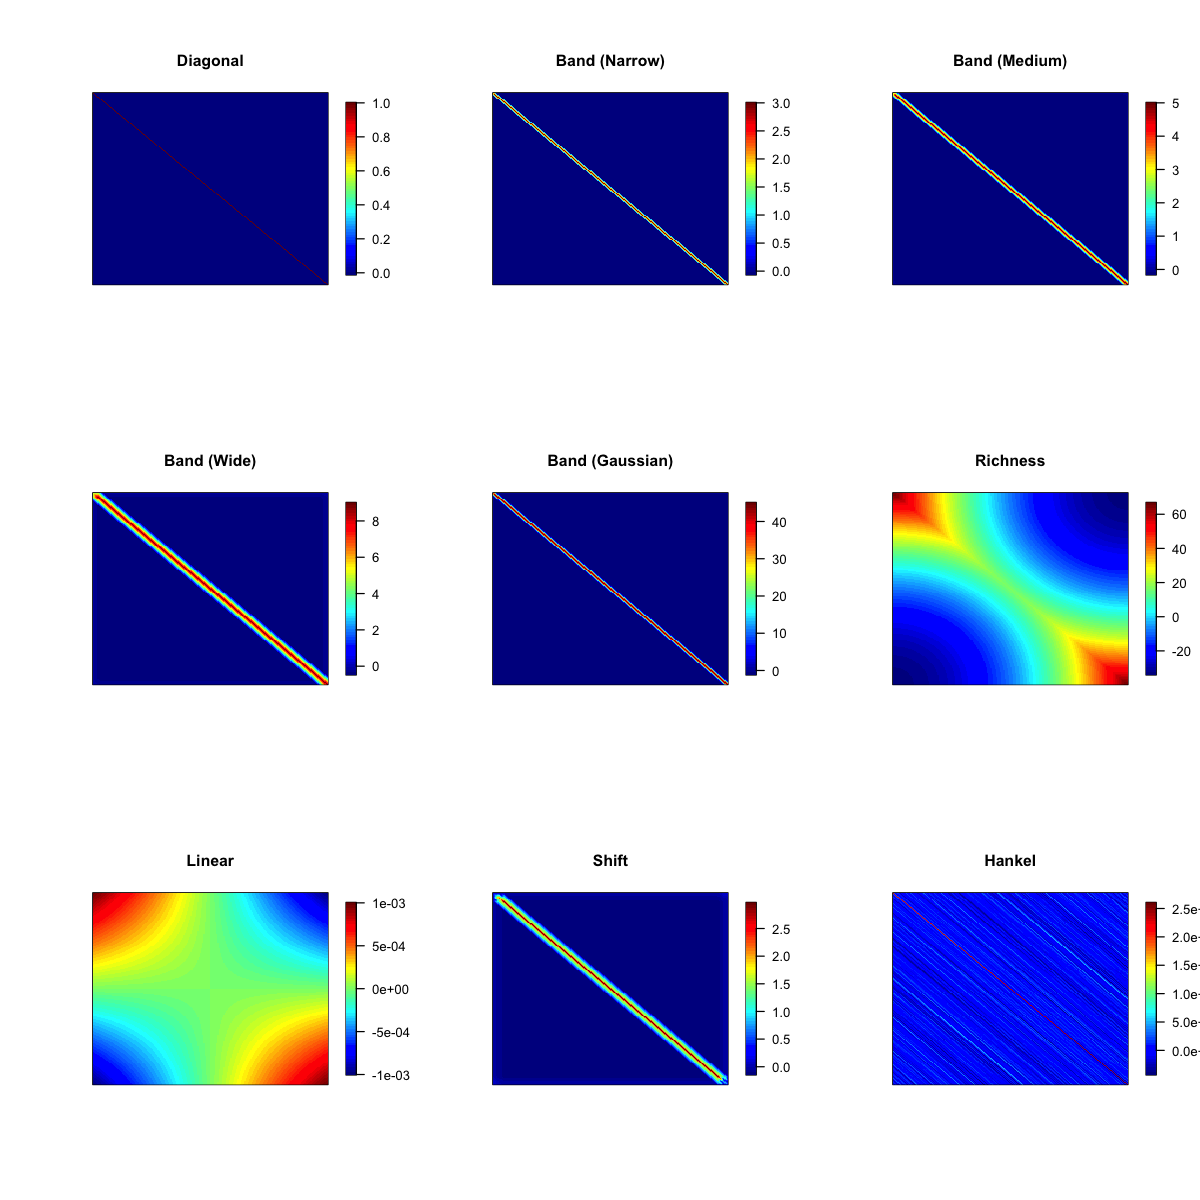

In [7]:
data_diagonal_norm <- t(scale(t(data_diagonal), center=TRUE, scale=FALSE))
data_band_narrow_norm <- t(scale(t(data_band_narrow), center=TRUE, scale=FALSE))
data_band_medium_norm <- t(scale(t(data_band_medium), center=TRUE, scale=FALSE))
data_band_wide_norm <- t(scale(t(data_band_wide), center=TRUE, scale=FALSE))
data_band_gauss_norm <- t(scale(t(data_band_gauss), center=TRUE, scale=FALSE))
data_richness_norm <- t(scale(t(data_richness), center=TRUE, scale=FALSE))
data_linear_norm <- t(scale(t(data_linear), center=TRUE, scale=FALSE))
data_shift_norm <- t(scale(t(data_shift), center=TRUE, scale=FALSE))
data_hankel_norm <- t(scale(t(data_hankel), center=TRUE, scale=FALSE))

layout(rbind(1:3, 4:6, 7:9))
options(repr.plot.width = 10, repr.plot.height = 10)
image.plot2(t(data_diagonal_norm) %*% data_diagonal_norm, main="Diagonal")
image.plot2(t(data_band_narrow_norm) %*% data_band_narrow_norm, main="Band (Narrow)")
image.plot2(t(data_band_medium_norm) %*% data_band_medium_norm, main="Band (Medium)")
image.plot2(t(data_band_wide_norm) %*% data_band_wide_norm, main="Band (Wide)")
image.plot2(t(data_band_gauss_norm) %*% data_band_gauss_norm, main="Band (Gaussian)")
image.plot2(t(data_richness_norm) %*% data_richness_norm, main="Richness")
image.plot2(t(data_linear_norm) %*% data_linear_norm, main="Linear")
image.plot2(t(data_shift_norm) %*% data_shift_norm, main="Shift")
image.plot2(t(data_hankel_norm) %*% data_hankel_norm, main="Hankel")

## PCAのスコアの確認

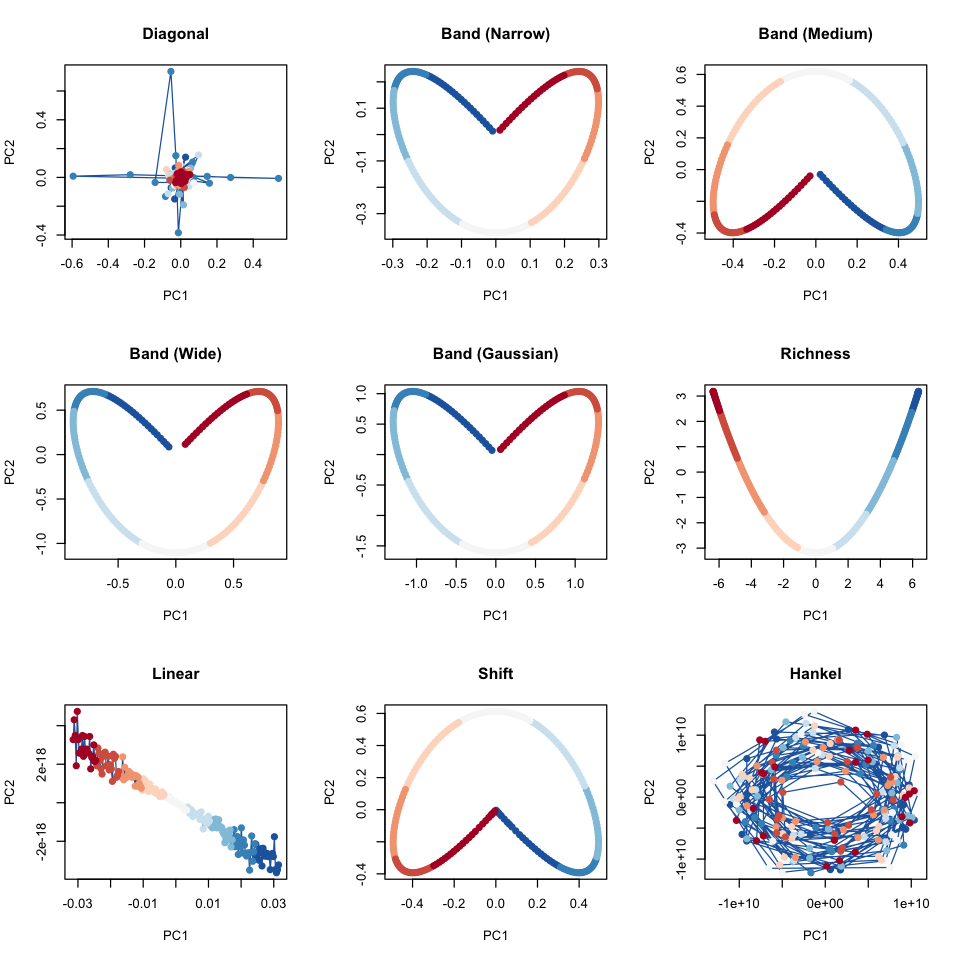

In [8]:
## PCA
pca_score_diagonal <- prcomp(t(data_diagonal), center=TRUE, scale=FALSE)$x
pca_score_band_narrow <- prcomp(t(data_band_narrow), center=TRUE, scale=FALSE)$x
pca_score_band_medium <- prcomp(t(data_band_medium), center=TRUE, scale=FALSE)$x
pca_score_band_wide <- prcomp(t(data_band_wide), center=TRUE, scale=FALSE)$x
pca_score_band_gauss <- prcomp(t(data_band_gauss), center=TRUE, scale=FALSE)$x
pca_score_richness <- prcomp(t(data_richness), center=TRUE, scale=FALSE)$x
pca_score_linear <- prcomp(t(data_linear), center=TRUE, scale=FALSE)$x
pca_score_shift <- prcomp(t(data_shift), center=TRUE, scale=FALSE)$x
pca_score_hankel <- prcomp(t(data_hankel), center=TRUE, scale=FALSE)$x

## Score Plot (PCA)
layout(rbind(1:3, 4:6, 7:9))
options(repr.plot.width = 8, repr.plot.height = 8)
plot(pca_score_diagonal[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_diagonal)), main="Diagonal")
plot(pca_score_band_narrow[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_band_narrow)), main="Band (Narrow)")
plot(pca_score_band_medium[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_band_medium)), main="Band (Medium)")
plot(pca_score_band_wide[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_band_wide)), main="Band (Wide)")
plot(pca_score_band_gauss[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_band_gauss)), main="Band (Gaussian)")
plot(pca_score_richness[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_richness)), main="Richness")
plot(pca_score_linear[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_linear)), main="Linear")
plot(pca_score_shift[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_shift)), main="Shift")
plot(pca_score_hankel[,1:2], type="o", pch=19, col=seq_color(nrow(pca_score_hankel)), main="Hankel")

## PCAの高次スコアが振動していることを確認

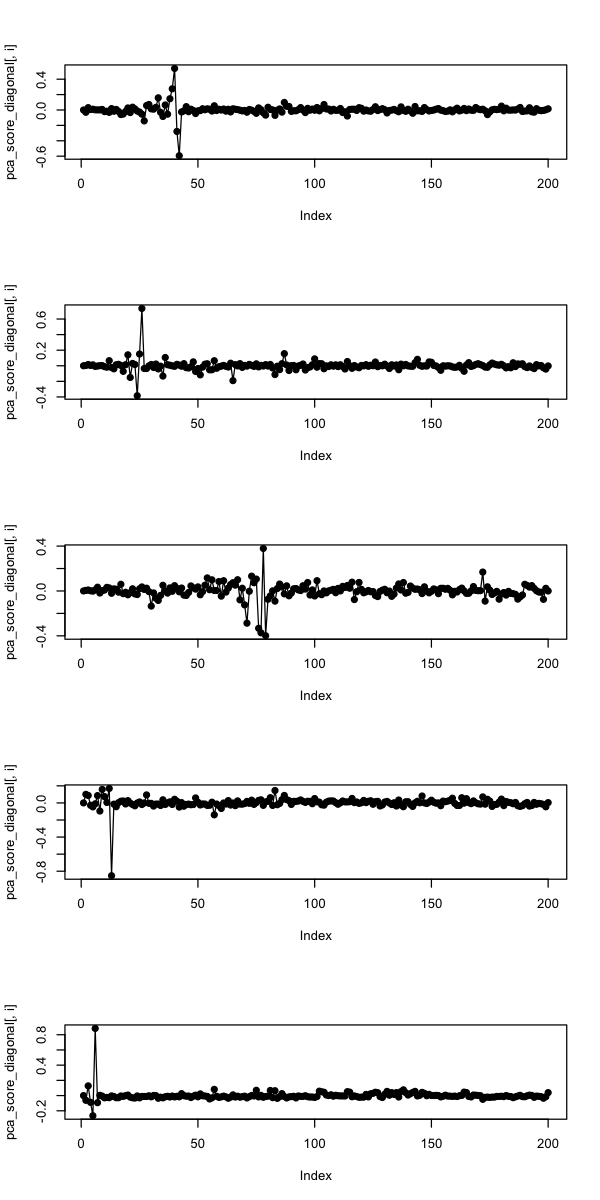

In [9]:
# 対角行列では振動しない
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_diagonal[,i], type="o", pch=19)
}

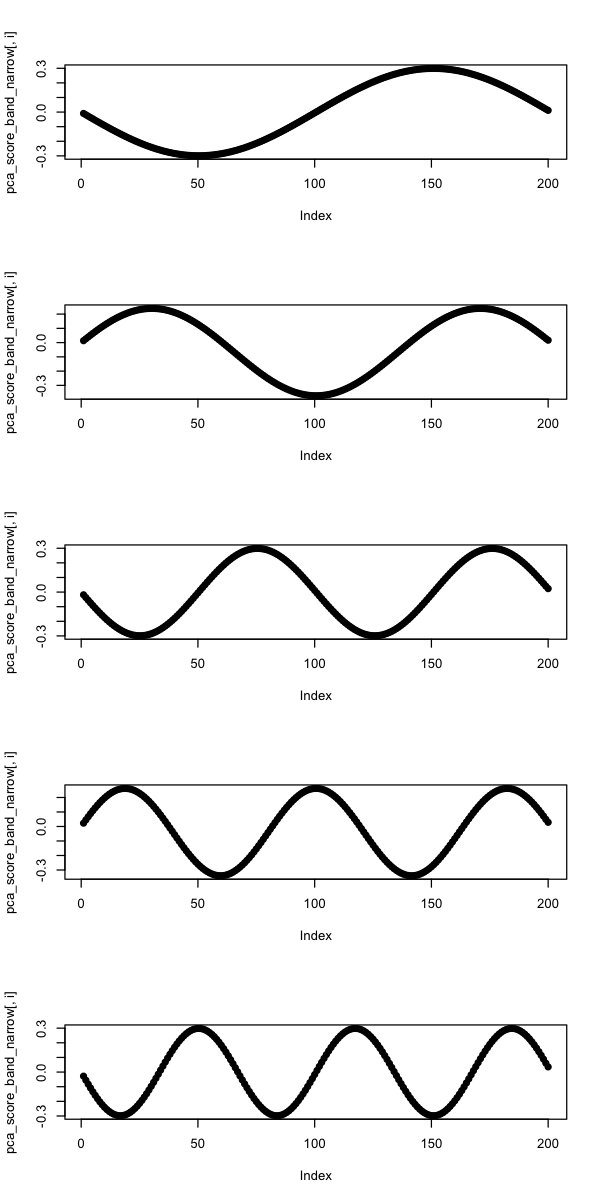

In [10]:
# 帯行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_band_narrow[,i], type="o", pch=19)
}

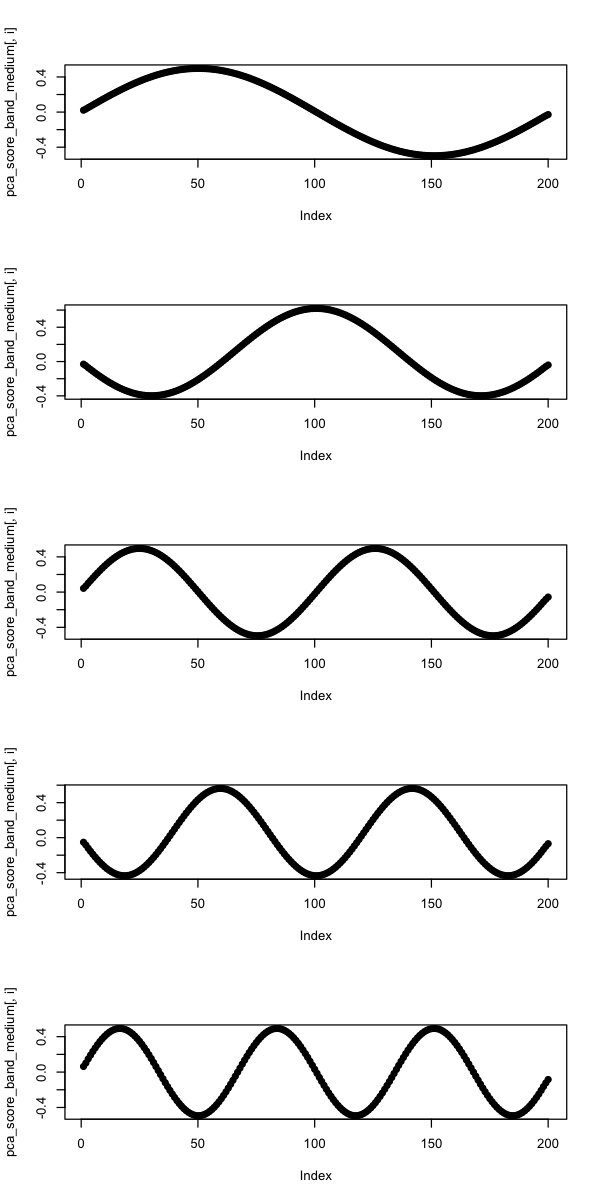

In [11]:
# 帯行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_band_medium[,i], type="o", pch=19)
}

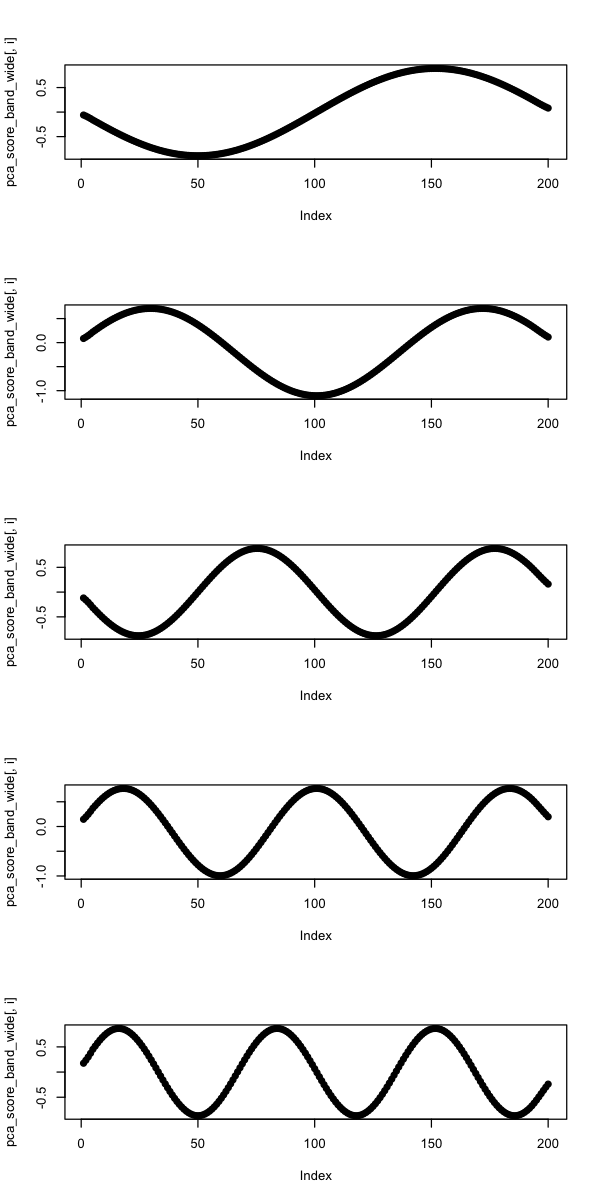

In [12]:
# 帯行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_band_wide[,i], type="o", pch=19)
}

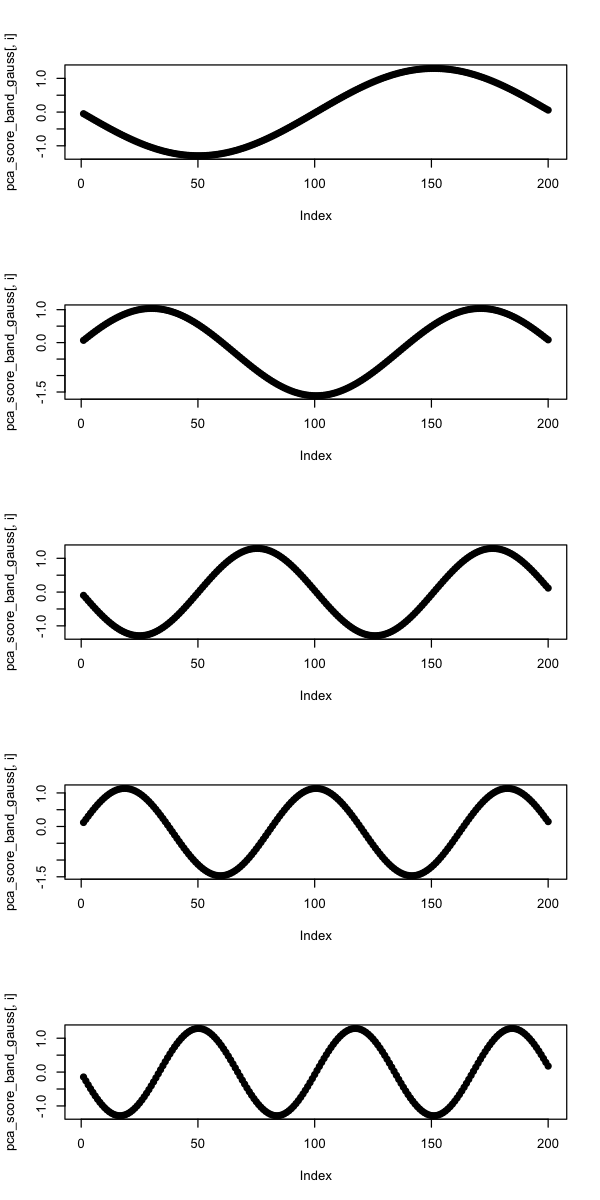

In [13]:
# ガウス帯行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_band_gauss[,i], type="o", pch=19)
}

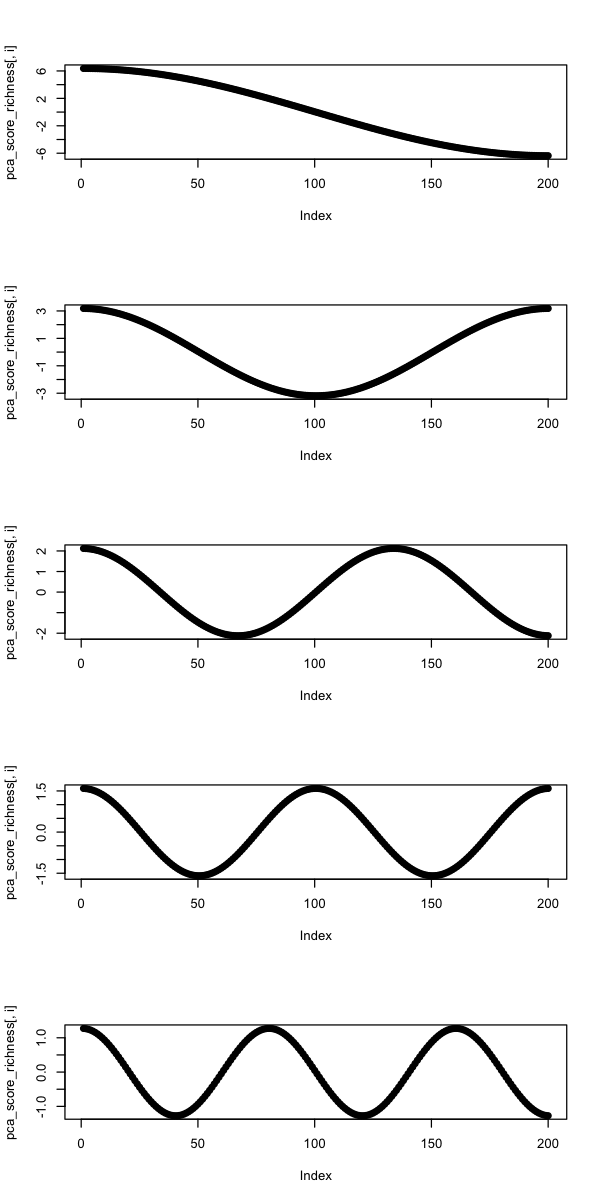

In [14]:
# リッチネス行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_richness[,i], type="o", pch=19)
}

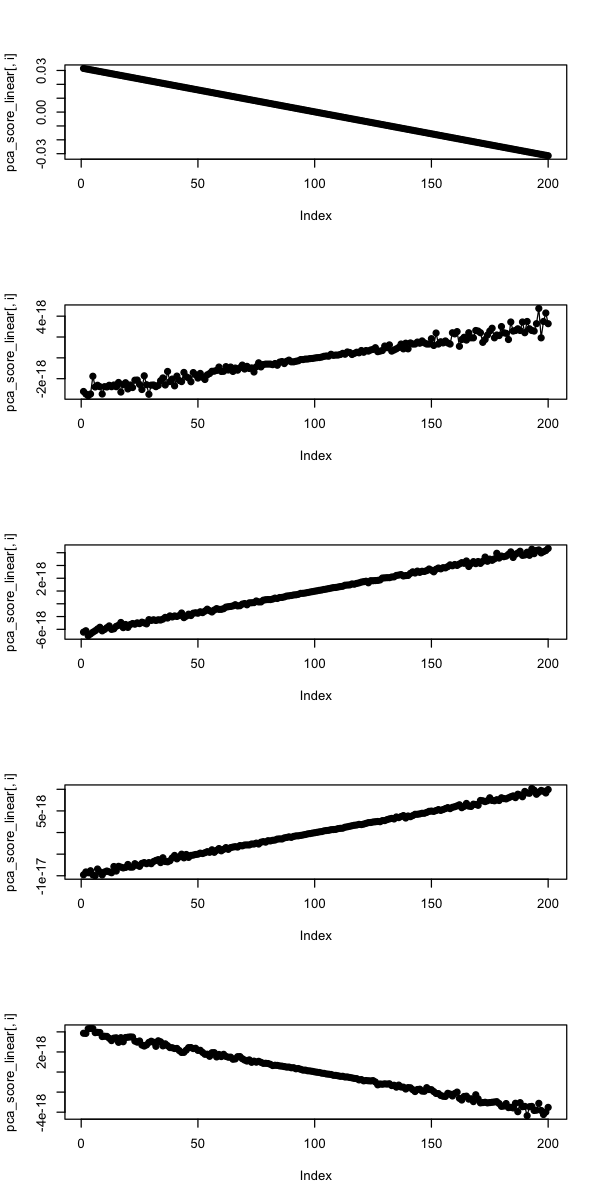

In [15]:
# リニア行列ではリニアな基底 + 振動？
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_linear[,i], type="o", pch=19)
}

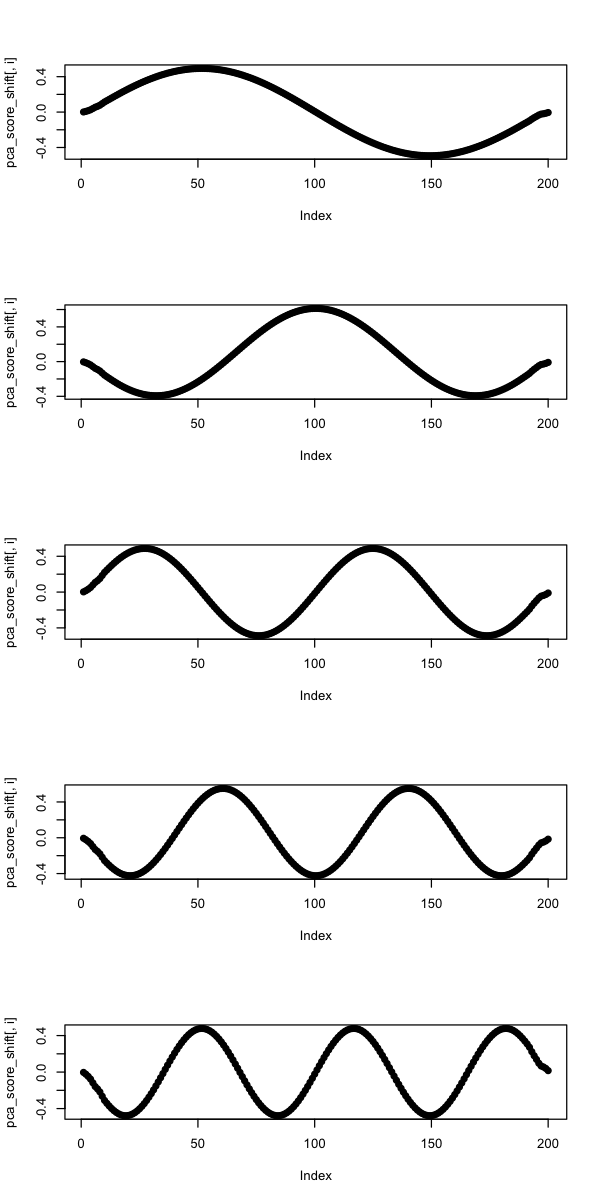

In [16]:
# シフト行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_shift[,i], type="o", pch=19)
}

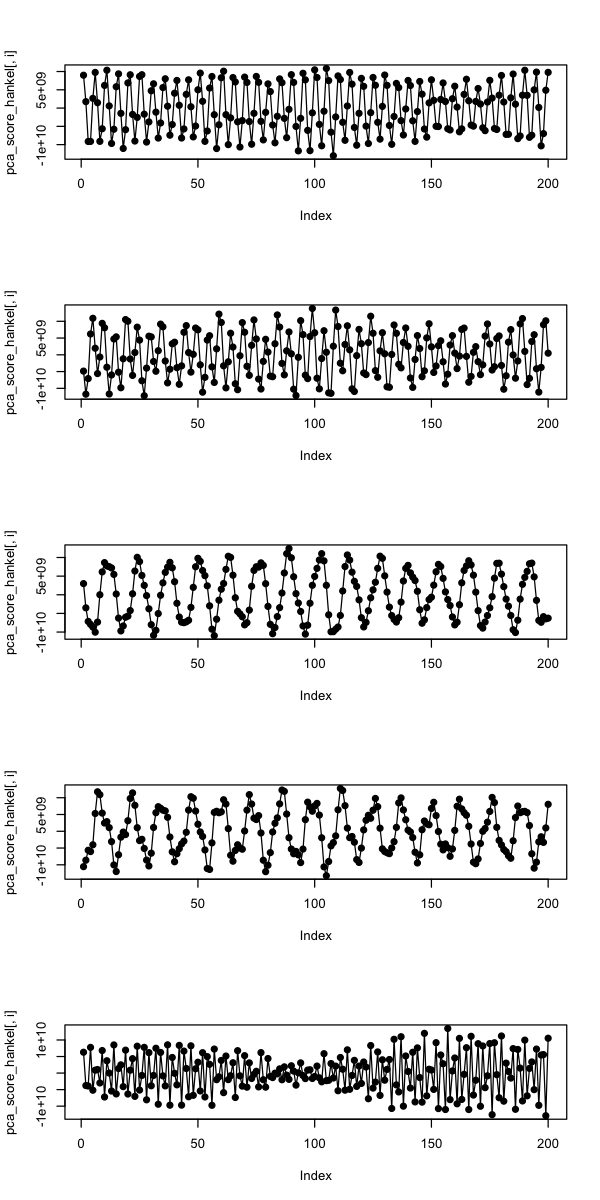

In [17]:
# ハンケル行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(pca_score_hankel[,i], type="o", pch=19)
}

## CAのスコアの確認

Warning message in CA(t(data_diagonal), graph = FALSE):
“The columns V201, V202, V203, V204, V205, V206, V207, V208, V209, V210, V211, V212, V213, V214, V215, V216, V217, V218, V219, V220, V221, V222, V223, V224, V225, V226, V227, V228, V229, V230, V231, V232, V233, V234, V235, V236, V237, V238, V239, V240, V241, V242, V243, V244, V245, V246, V247, V248, V249, V250, V251, V252, V253, V254, V255, V256, V257, V258, V259, V260, V261, V262, V263, V264, V265, V266, V267, V268, V269, V270, V271, V272, V273, V274, V275, V276, V277, V278, V279, V280, V281, V282, V283, V284, V285, V286, V287, V288, V289, V290, V291, V292, V293, V294, V295, V296, V297, V298, V299, V300 sum at 0. They were suppressed from the analysis”
Warning message in CA(t(data_band_narrow), graph = FALSE):
“The columns V202, V203, V204, V205, V206, V207, V208, V209, V210, V211, V212, V213, V214, V215, V216, V217, V218, V219, V220, V221, V222, V223, V224, V225, V226, V227, V228, V229, V230, V231, V232, V233, V234, V235, V236, 

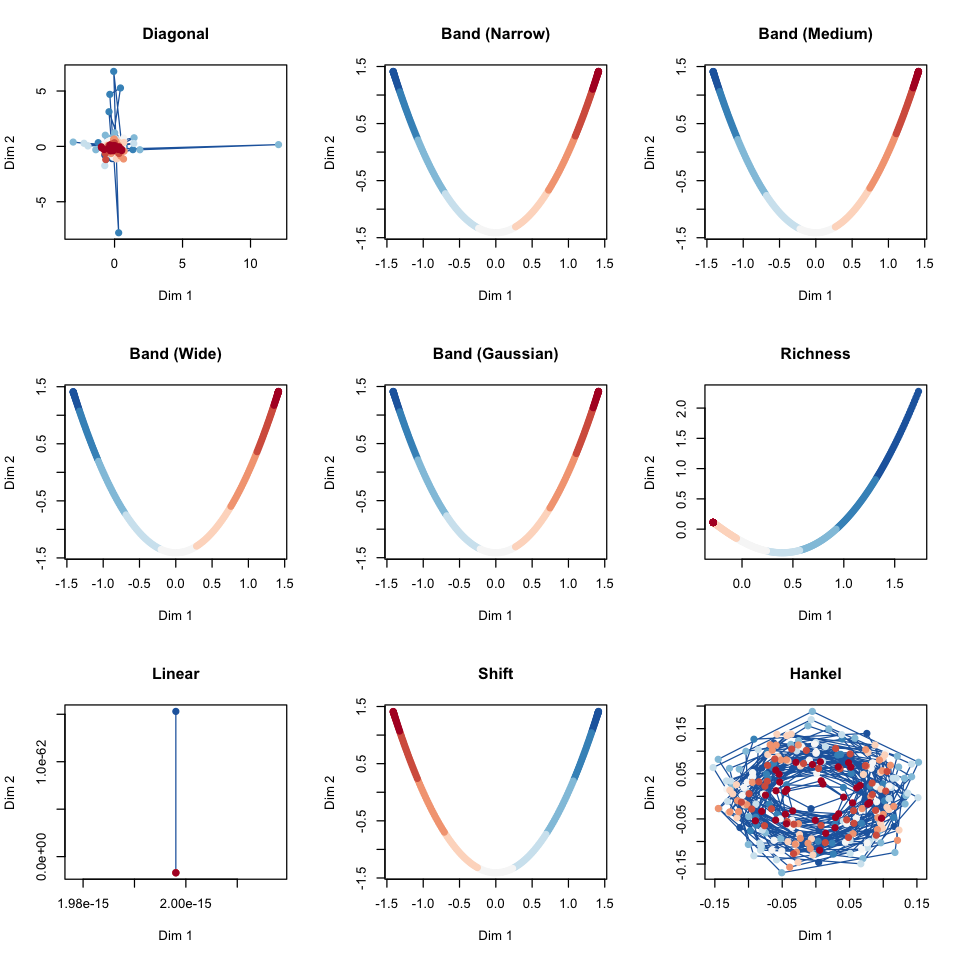

In [18]:
## CA
ca_score_diagonal = CA(t(data_diagonal), graph=FALSE)$col$coord
ca_score_band_narrow = CA(t(data_band_narrow), graph=FALSE)$col$coord
ca_score_band_medium = CA(t(data_band_medium), graph=FALSE)$col$coord
ca_score_band_wide = CA(t(data_band_wide), graph=FALSE)$col$coord
ca_score_band_gauss = CA(t(data_band_gauss), graph=FALSE)$col$coord
ca_score_richness = CA(t(data_richness), graph=FALSE)$col$coord
ca_score_linear = CA(t(data_linear), graph=FALSE)$col$coord
ca_score_shift = CA(t(data_shift), graph=FALSE)$col$coord
ca_score_hankel = CA(t(data_hankel), graph=FALSE)$col$coord

## Score Plot (CA)
layout(rbind(1:3, 4:6, 7:9))
options(repr.plot.width = 8, repr.plot.height = 8)
plot(ca_score_diagonal[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_diagonal)), main="Diagonal")
plot(ca_score_band_narrow[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_band_narrow)), main="Band (Narrow)")
plot(ca_score_band_medium[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_band_medium)), main="Band (Medium)")
plot(ca_score_band_wide[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_band_wide)), main="Band (Wide)")
plot(ca_score_band_gauss[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_band_gauss)), main="Band (Gaussian)")
plot(ca_score_richness[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_richness)), main="Richness")
plot(ca_score_linear[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_linear)), main="Linear")
plot(ca_score_shift[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_shift)), main="Shift")
plot(ca_score_hankel[,1:2], type="o", pch=19, col=seq_color(nrow(ca_score_hankel)), main="Hankel")

## CAの高次スコアが振動していることを確認

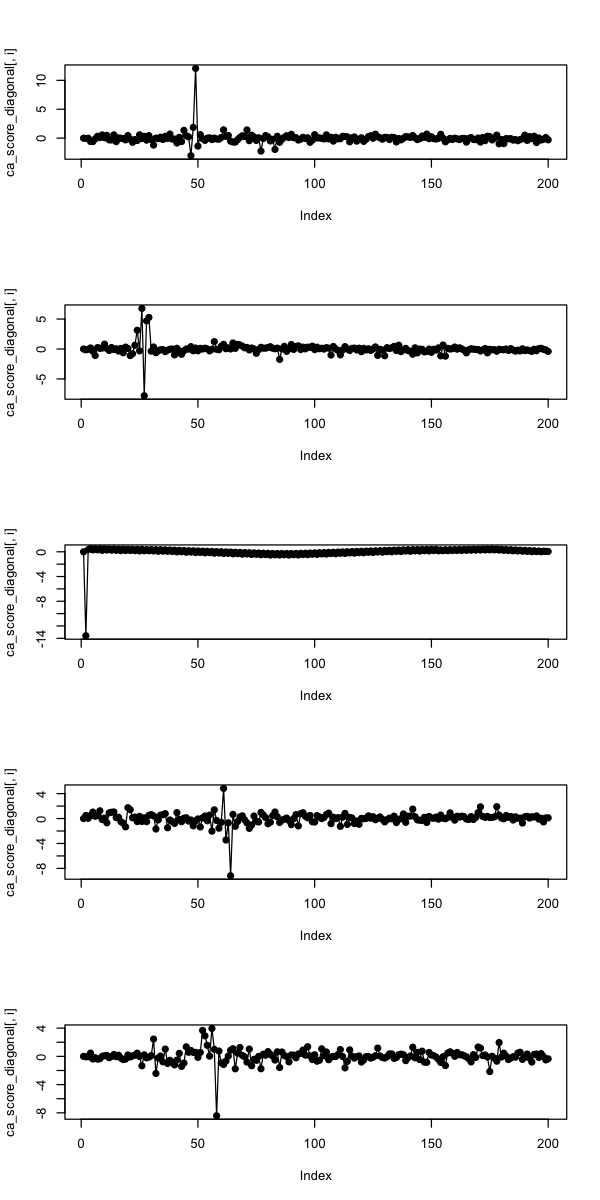

In [19]:
# 対角行列だと振動しない
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_diagonal[,i], type="o", pch=19)
}

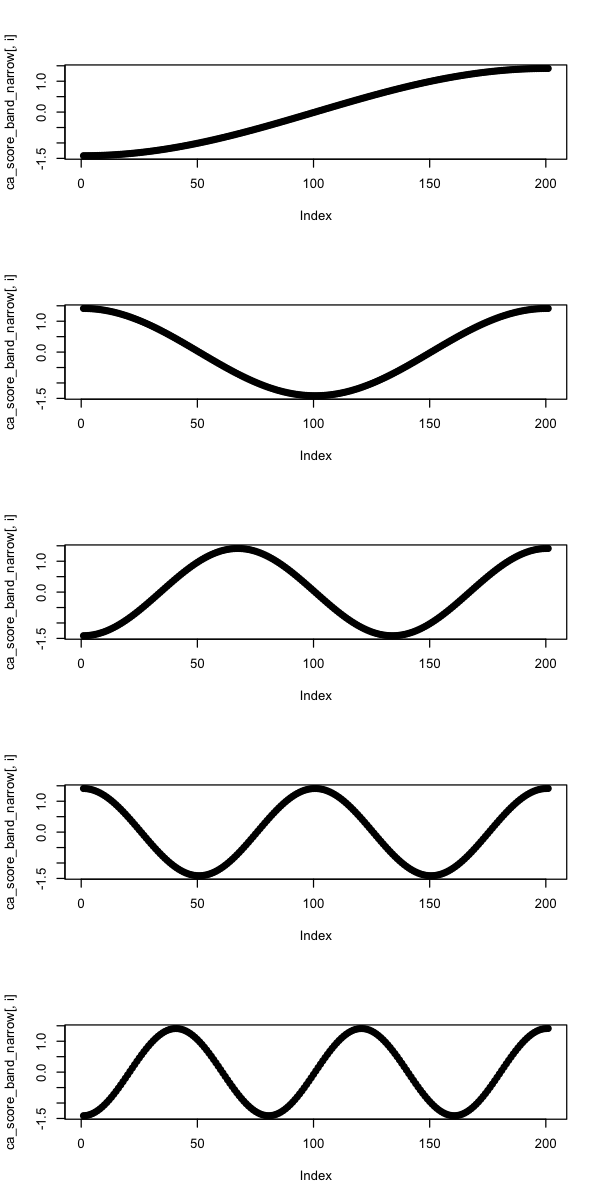

In [20]:
# 帯行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_band_narrow[,i], type="o", pch=19)
}

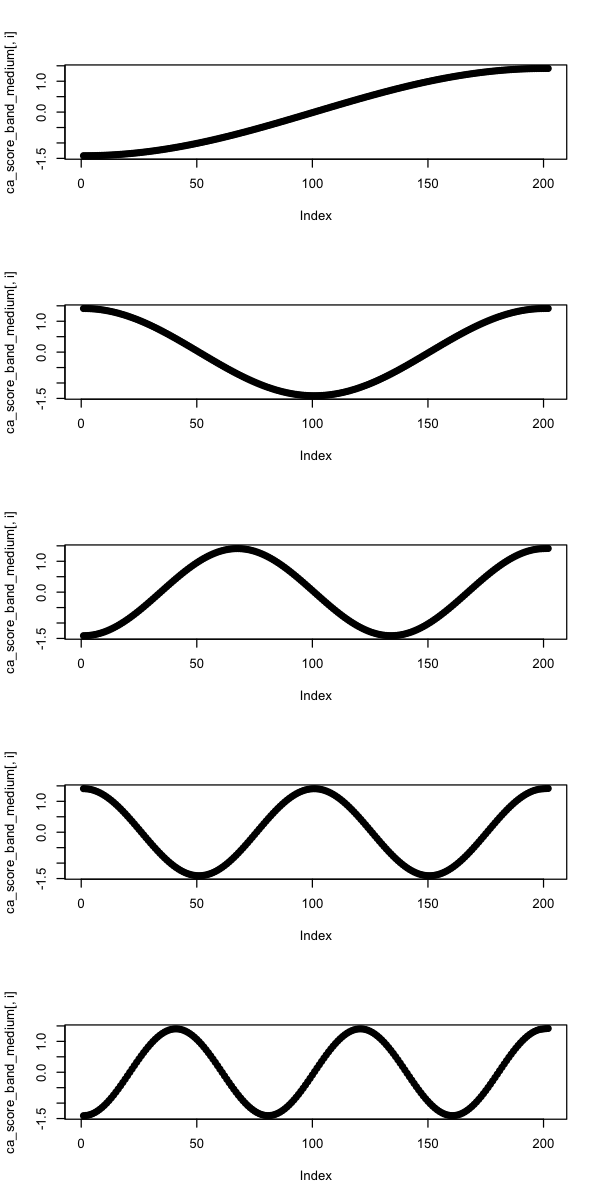

In [21]:
# 帯行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_band_medium[,i], type="o", pch=19)
}

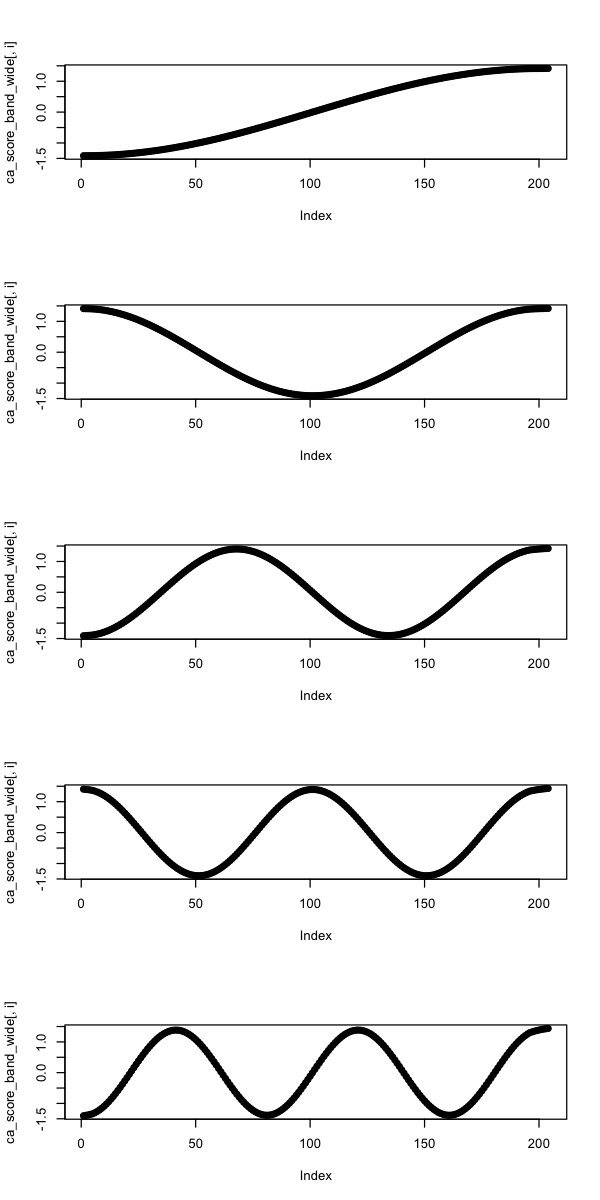

In [22]:
# 帯行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_band_wide[,i], type="o", pch=19)
}

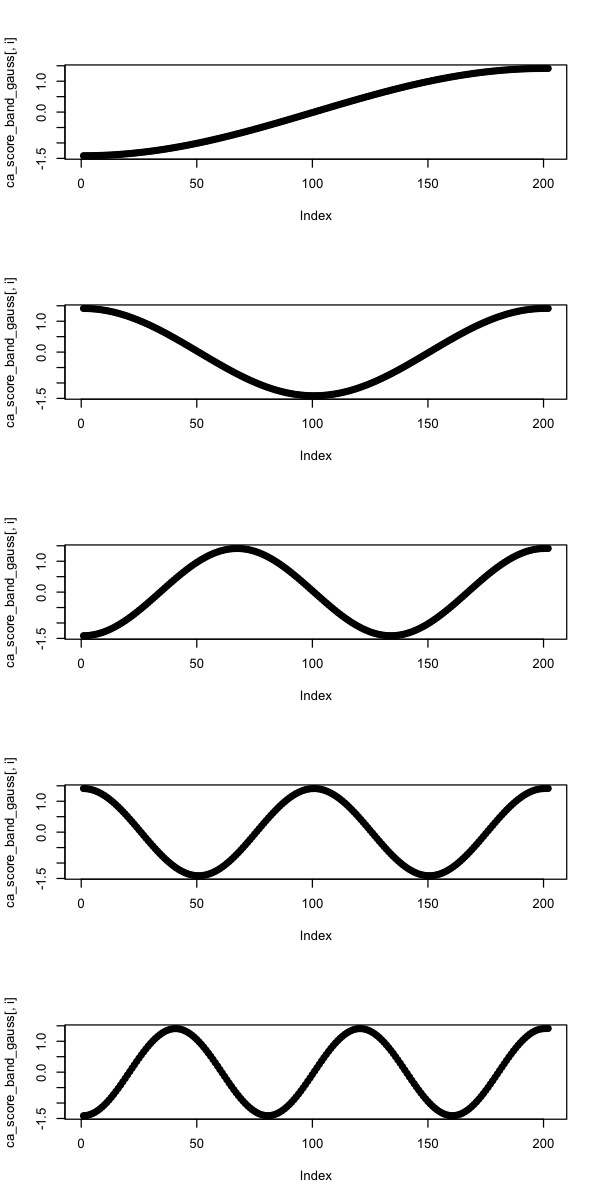

In [23]:
# ガウス帯行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_band_gauss[,i], type="o", pch=19)
}

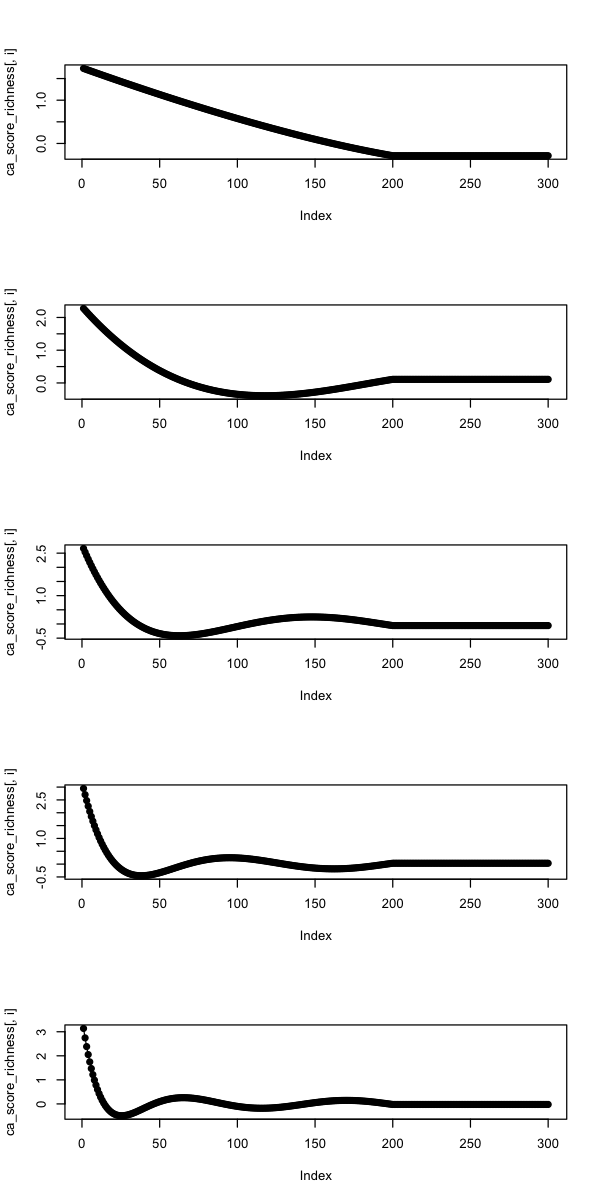

In [24]:
# リッチネス行列だと?
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_richness[,i], type="o", pch=19)
}

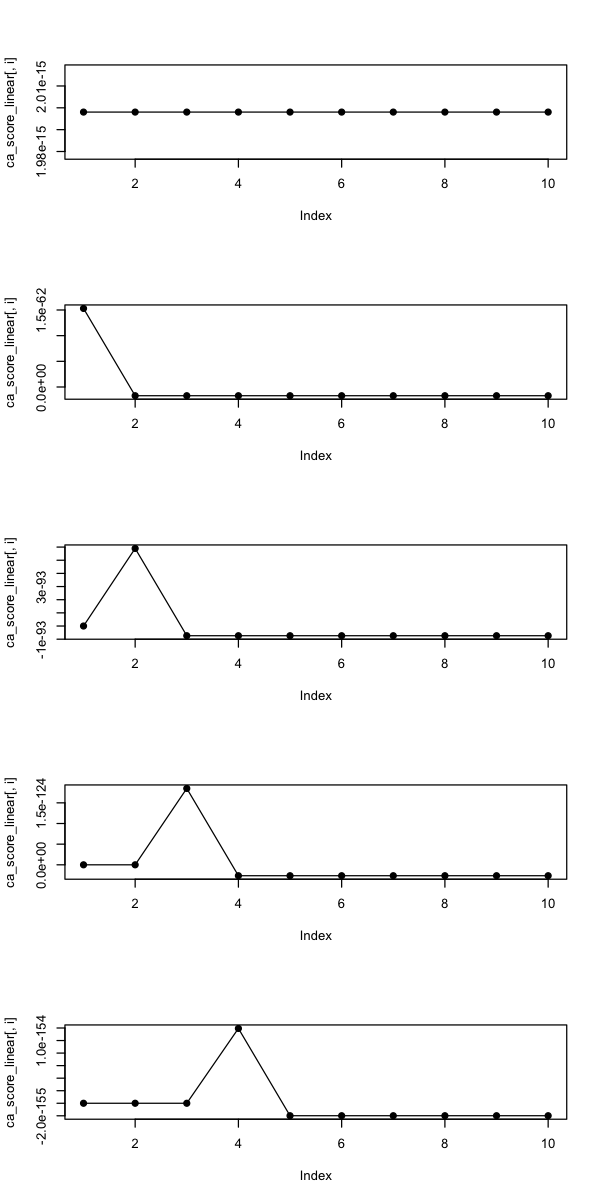

In [25]:
# リニア行列だと？
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_linear[,i], type="o", pch=19)
}

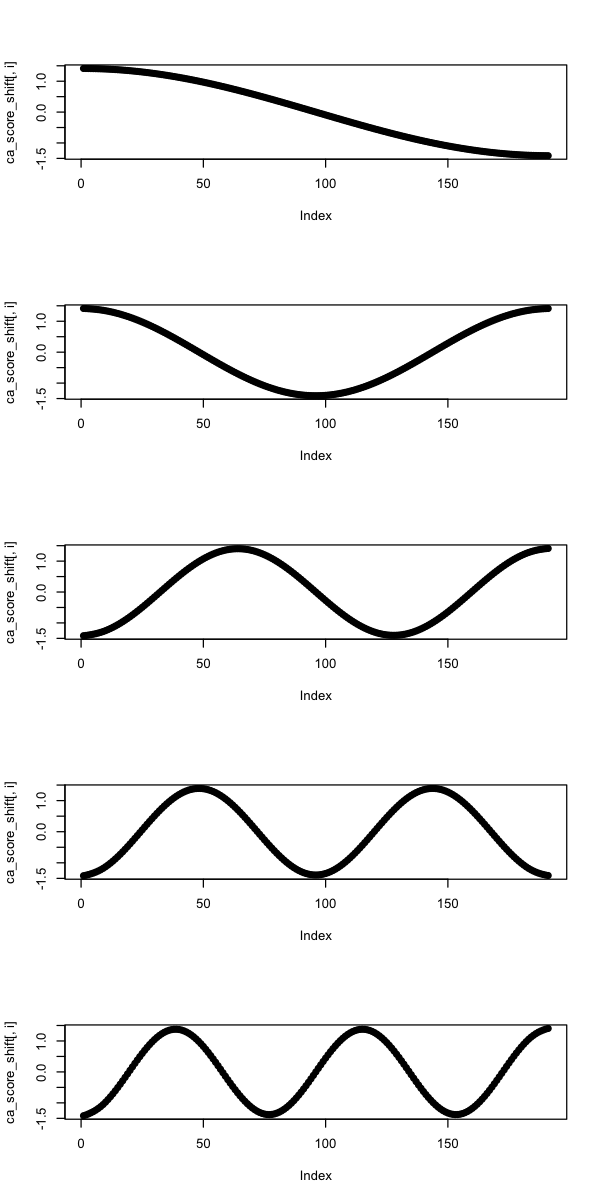

In [26]:
# シフト行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_shift[,i], type="o", pch=19)
}

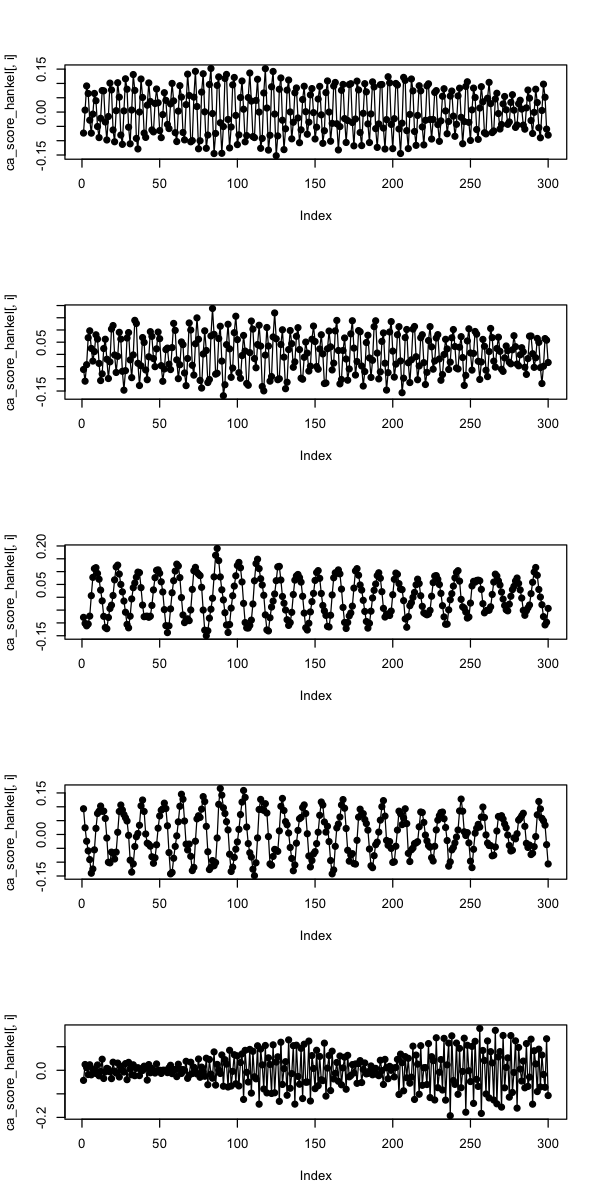

In [27]:
# ハンケル行列だと振動する
layout(as.matrix(1:5))
options(repr.plot.width = 5, repr.plot.height = 10)
for(i in 1:5){
	plot(ca_score_hankel[,i], type="o", pch=19)
}

In [28]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20.0.0
Running under: macOS Sonoma 14.6.1

Matrix products: default
BLAS/LAPACK: /Users/koki/anaconda3/lib/libopenblas.0.dylib;  LAPACK version 3.12.0

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

time zone: Asia/Tokyo
tzcode source: system (macOS)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] FactoMineR_2.11   tagcloud_0.6      Rcpp_1.0.13-1     fields_16.3      
[5] viridisLite_0.4.2 spam_2.11-0      

loaded via a namespace (and not attached):
 [1] gtable_0.3.6         jsonlite_1.8.9       dplyr_1.1.4         
 [4] compiler_4.4.1       crayon_1.5.3         maps_3.4.2.1        
 [7] tidyselect_1.2.1     IRdisplay_1.1        leaps_3.2           
[10] cluster_2.1.6        scales_1.3.0         multcompView_0.1-10 
[13] uuid_1.2-1           fastmap_1.2.0        IRkernel_1.3.2      
[16] lattice_0.22-6       R6_2.5.1   